In [2]:
#로지스틱 회귀분석 예제

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [3]:
#train_cols = df.columns[1:]
df = pd.read_csv('c:/data/Data/titanic/train3.csv')
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [4]:
df.columns

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [5]:
df.shape

(891, 10)

In [6]:
df.describe()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.242424,0.206510,0.551066,0.647587,0.352413,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.428790,0.405028,0.497665,0.477990,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#생존 여부를 기준으로 한 평균값들
df.groupby('Survived').mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


Text(0, 0.5, '빈도')

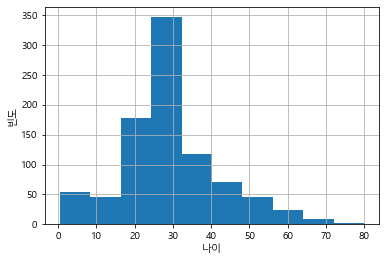

In [8]:
%matplotlib inline
df['Age'].hist()
plt.xlabel('나이')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

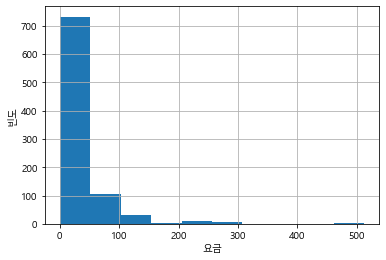

In [9]:
%matplotlib inline
df['Fare'].hist()
plt.xlabel('요금')
plt.ylabel('빈도')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

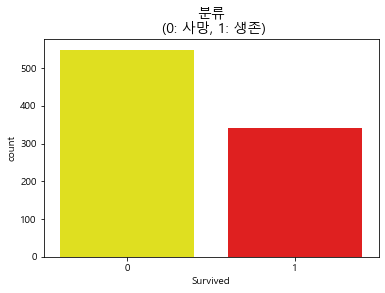

In [10]:
from matplotlib import font_manager, rc
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['yellow', 'red']

#[1:]

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

sns.countplot('Survived', data=df, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)

In [11]:
from sklearn.model_selection import train_test_split
train_cols = df.columns[1:]

X = df[train_cols]
y = df['Survived']

print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [12]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [13]:
#오버샘플링
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [14]:
df2

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare,Survived
0,0,0,1,1,0,22.000000,1,0,7.250000,0
1,1,0,0,0,1,38.000000,1,0,71.283300,1
2,0,0,1,0,1,26.000000,0,0,7.925000,1
3,1,0,0,0,1,35.000000,1,0,53.100000,1
4,0,0,1,1,0,35.000000,0,0,8.050000,0
...,...,...,...,...,...,...,...,...,...,...
1093,1,0,0,0,1,33.248913,0,1,115.819860,1
1094,0,0,1,1,0,9.000000,0,1,18.326241,1
1095,0,0,0,0,0,4.115969,1,1,19.033624,1
1096,0,0,1,1,0,32.000000,0,0,8.031579,1


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

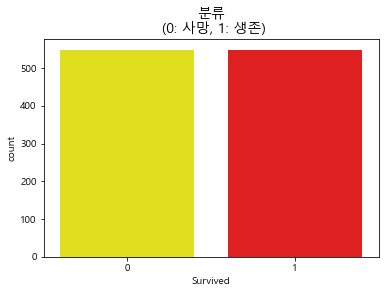

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['yellow', 'red']

sns.countplot('Survived', data=df2, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)

In [16]:
train_cols = df.columns[1:]

X = X_samp[train_cols]
y = y_samp['Survived']

In [17]:
#import statsmodels.discrete.discrete_model as sm
#질문: 이전 와인데이터처럼 discrete를 import 해아하는가?

import statsmodels.api as sm
model=sm.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.450132
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.351      
Dependent Variable: Survived         AIC:              1006.4895  
Date:               2021-12-09 11:13 BIC:              1051.5008  
No. Observations:   1098             Log-Likelihood:   -494.24    
Df Model:           8                LL-Null:          -761.08    
Df Residuals:       1089             LLR p-value:      4.1907e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
--------------------------------------------------------------------
Pclass1     2.2377     0.3859    5.7985   0.0000    1.4813    2.9940
Pclass2     1.6164     0.3309    4.8854   0.0000    0.9679    2.2649
Pclass3     0.7344     0.2956    2.4843   0.0130    0.1550    1.3137
male       -2.2844     0.3106   -7.3553   0.0000   -2.8931   -1.6757
female      0.7760     0.3019    2.5708   0.0101    0.1844    1.3677
Age        -0.0126     0.0061   -2.0454   0.0408   -0.0246   -0.0005
SibSp      -0.3715     0.1016   -3.6553   0.0003   -0.5707   -0.1723
Parch      -0.1452     0.1111   -1.3067   0.1913   -0.3629    0.0726
Fare        0.0069     0.0030    2.3453   0.0190    0.0011    0.0127
==================================================================

"""

In [18]:
# # pvalue가 0.05보다 큰 값들을 제거
# # columns 중 성별'sex' 요소가 없음
# train_cols = ['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age']

# X = df[train_cols]
# y = df['Survived']

In [19]:
# import statsmodels.api as sm
# model = sm.Logit(y,X)
# result = model.fit()
# result.summary2()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
print('학습용:', model.score(X_train, y_train))
print('검증용:', model.score(X_test, y_test))

학습용: 0.8177676537585421
검증용: 0.8090909090909091


In [22]:
#confusion matrix 출력
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
cm

array([[93, 19],
       [23, 85]], dtype=int64)

In [23]:
df_cm = pd.DataFrame(cm, index=['사망', '생존'], columns=['사망', '생존'])

df_cm

,사망,생존
사망,93,19
생존,23,85


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-pack

<AxesSubplot:>

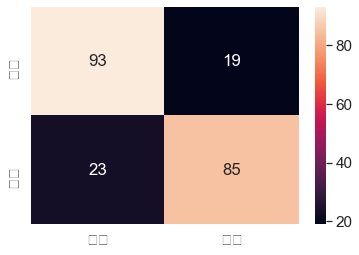

In [24]:
#질문: 한글 깨짐

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure('confusion Matrix')
sns.heatmap(df_cm, annot=True)

In [25]:
import numpy as np
#새로운 값 예측
#1등석, 2등석, 3등석, 남성, 여성, 나이, 요금, 형제자매, 부모자녀
#3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
#person1 = np.array([0,0,1,1,0,19,1,0,50]).reshape(1,9)
person1 = [[0,0,1,1,0,19,1,0,50]]
person2 = np.array([1,0,0,0,1,17,0,2,30]).reshape(1,9) # 2차원배열로 변환
preson3 = np.array([0,1,0,0,1,40,2,0,70]).reshape(1,9)
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(preson3))
print(model.predict_proba(preson3))

[0]
[1]
[1]
[[0.26982446 0.73017554]]


In [26]:
import joblib
joblib.dump(model, 'c:/data/Data/titanic/titanic_logit.model')

['c:/data/Data/titanic/titanic_logit.model']

In [27]:
import joblib
model = joblib.load('c:/data/Data/titanic/titanic_logit.model')

In [28]:
import numpy as np
person1 = np.array([0,0,1,1,19,50]).reshape(1,7)
person2 = np.array([2,0,0,0,1,17,30]).reshape(1,7)
person3 = np.array([0,1,0,0,1,40,70]).reshape(1,7)

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))
rate=model.predict_proba(person1)
print(rate[0][-1])

ValueError: cannot reshape array of size 6 into shape (1,7)